# Data load

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('top_1200_featuresN.csv')
df.head()


,cg00690402,cg02327530,cg02673417,cg02596779,cg02076629,cg02541582,cg03720100,cg02551745,cg01841651,cg02381279,...,cg26646867,cg26124980,cg24453118,cg27360727,cg27347269,cg23161218,cg25031824,cg25936138,cg24876577,target
0,7428,2827,5501,1284,4374,3878,2477,3601,3583,1247,...,788,620,1244,5225,650,3220,7311,3076,15227,con
1,6905,2735,5535,1448,3746,3935,2278,3211,2884,1412,...,900,1129,1673,4492,649,3721,6467,4134,16252,con
2,6743,1521,6683,913,3363,3641,2048,3266,2646,1118,...,890,773,1301,3698,522,2336,6090,1809,16287,scz
3,6792,2105,6286,1319,3447,3289,2722,3074,2840,1506,...,925,711,1720,3896,592,2748,7167,5028,18189,con
4,5773,2421,6657,1075,3146,3137,2790,3177,3180,1526,...,853,658,1492,3751,667,2793,8517,2292,17353,scz


# Data preprocessing

In [2]:
# duplicate 
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Columns: 1201 entries, cg00690402 to target
dtypes: int64(1200), object(1)
memory usage: 7.8+ MB


In [4]:
df.describe()


,cg00690402,cg02327530,cg02673417,cg02596779,cg02076629,cg02541582,cg03720100,cg02551745,cg01841651,cg02381279,...,cg23575275,cg26646867,cg26124980,cg24453118,cg27360727,cg27347269,cg23161218,cg25031824,cg25936138,cg24876577
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,...,847.000000,847.000000,847.000000,847.00000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,7139.487603,2532.729634,5349.340024,1162.719008,4047.453365,4076.853601,2861.789847,3929.344746,3229.064935,1522.182999,...,5414.097993,953.469894,874.409681,1488.49941,4659.546635,605.194805,3153.028335,7266.763872,4257.396694,15498.272727
std,1659.867281,765.234817,914.436426,401.868222,1054.975558,1068.665157,906.838425,1015.967592,905.422399,457.251017,...,1360.173038,275.402085,400.108157,434.73460,1040.559164,157.681236,1127.365086,1660.203006,1215.960314,2299.031359
min,3255.000000,977.000000,3263.000000,331.000000,955.000000,1362.000000,1090.000000,1299.000000,1168.000000,598.000000,...,1650.000000,307.000000,200.000000,444.00000,1978.000000,230.000000,624.000000,2940.000000,1140.000000,10393.000000
25%,6031.000000,1977.000000,4672.500000,877.000000,3337.000000,3362.000000,2215.500000,3241.000000,2556.500000,1200.000000,...,4521.500000,751.500000,614.000000,1185.50000,3924.000000,491.000000,2365.500000,6210.500000,3405.500000,13882.500000
50%,6981.000000,2474.000000,5341.000000,1101.000000,3984.000000,4008.000000,2680.000000,3907.000000,3170.000000,1488.000000,...,5410.000000,923.000000,782.000000,1422.00000,4605.000000,589.000000,3056.000000,7178.000000,4134.000000,15446.000000
75%,8142.000000,2931.500000,5956.000000,1385.000000,4753.000000,4660.000000,3317.500000,4549.000000,3820.500000,1791.000000,...,6181.000000,1128.000000,1036.500000,1717.50000,5267.000000,699.000000,3804.500000,8198.500000,4909.500000,17041.000000
max,13807.000000,5684.000000,8449.000000,3050.000000,7956.000000,8002.000000,8137.000000,7908.000000,6475.000000,3401.000000,...,10373.000000,2190.000000,3848.000000,3647.00000,8523.000000,1449.000000,7893.000000,12971.000000,9721.000000,23053.000000


In [5]:
# Null value checking
round((df.isnull().sum()/df.shape[0])*100,2)


cg00690402    0.0
cg02327530    0.0
cg02673417    0.0
cg02596779    0.0
cg02076629    0.0
             ... 
cg23161218    0.0
cg25031824    0.0
cg25936138    0.0
cg24876577    0.0
target        0.0
Length: 1201, dtype: float64

In [6]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df'
last_column = df.iloc[:, -1]  # Extract the last column
encoder = LabelEncoder()
encoded_last_column = encoder.fit_transform(last_column)

# Add the encoded column back to the DataFrame
df['Target'] = encoded_last_column
df.head()

,cg00690402,cg02327530,cg02673417,cg02596779,cg02076629,cg02541582,cg03720100,cg02551745,cg01841651,cg02381279,...,cg26124980,cg24453118,cg27360727,cg27347269,cg23161218,cg25031824,cg25936138,cg24876577,target,Target
0,7428,2827,5501,1284,4374,3878,2477,3601,3583,1247,...,620,1244,5225,650,3220,7311,3076,15227,con,0
1,6905,2735,5535,1448,3746,3935,2278,3211,2884,1412,...,1129,1673,4492,649,3721,6467,4134,16252,con,0
2,6743,1521,6683,913,3363,3641,2048,3266,2646,1118,...,773,1301,3698,522,2336,6090,1809,16287,scz,1
3,6792,2105,6286,1319,3447,3289,2722,3074,2840,1506,...,711,1720,3896,592,2748,7167,5028,18189,con,0
4,5773,2421,6657,1075,3146,3137,2790,3177,3180,1526,...,658,1492,3751,667,2793,8517,2292,17353,scz,1


In [7]:
# Data set view after encoded target 

import pandas as pd

df = df.drop(df.columns[1200], axis=1)
print(df)
df.head()


     cg00690402  cg02327530  cg02673417  cg02596779  cg02076629  cg02541582  \
0          7428        2827        5501        1284        4374        3878   
1          6905        2735        5535        1448        3746        3935   
2          6743        1521        6683         913        3363        3641   
3          6792        2105        6286        1319        3447        3289   
4          5773        2421        6657        1075        3146        3137   
..          ...         ...         ...         ...         ...         ...   
842        4144        1682        4425         601        2626        2478   
843        5034        1360        4548         879        3071        3536   
844        7611        2793        5466        1278        4280        4181   
845        4430        1626        5568         717        3043        2710   
846        6721        2854        5973        1136        4928        5227   

     cg03720100  cg02551745  cg01841651  cg02381279

,cg00690402,cg02327530,cg02673417,cg02596779,cg02076629,cg02541582,cg03720100,cg02551745,cg01841651,cg02381279,...,cg26646867,cg26124980,cg24453118,cg27360727,cg27347269,cg23161218,cg25031824,cg25936138,cg24876577,Target
0,7428,2827,5501,1284,4374,3878,2477,3601,3583,1247,...,788,620,1244,5225,650,3220,7311,3076,15227,0
1,6905,2735,5535,1448,3746,3935,2278,3211,2884,1412,...,900,1129,1673,4492,649,3721,6467,4134,16252,0
2,6743,1521,6683,913,3363,3641,2048,3266,2646,1118,...,890,773,1301,3698,522,2336,6090,1809,16287,1
3,6792,2105,6286,1319,3447,3289,2722,3074,2840,1506,...,925,711,1720,3896,592,2748,7167,5028,18189,0
4,5773,2421,6657,1075,3146,3137,2790,3177,3180,1526,...,853,658,1492,3751,667,2793,8517,2292,17353,1


In [8]:
#Define X and y

from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=["Target"])
y = df["Target"]


In [9]:
print(X.shape)  # Check the shape of X_balanced
print(y.shape)  # Check the shape of y_balanced


(847, 1200)
(847,)


# Feature selection by mutual information

In [10]:
# Calculate mutual information scores using scikit-learn's mutual_info_classif
mi_scores = mutual_info_classif(X, y)

# Create a pandas Series with feature names as indices
mi_scores_series = pd.Series(mi_scores, index=X.columns, name="MI Scores")

# Sort the Series in descending order
mi_scores_series = mi_scores_series.sort_values(ascending=False)

# Print the mutual information scores
print(mi_scores_series)

cg03519157    0.104483
cg22061832    0.104031
cg00804354    0.093946
cg02541582    0.091953
cg15075988    0.089380
                ...   
cg05322190    0.000000
cg18362538    0.000000
cg19119071    0.000000
cg08311803    0.000000
cg24876577    0.000000
Name: MI Scores, Length: 1200, dtype: float64


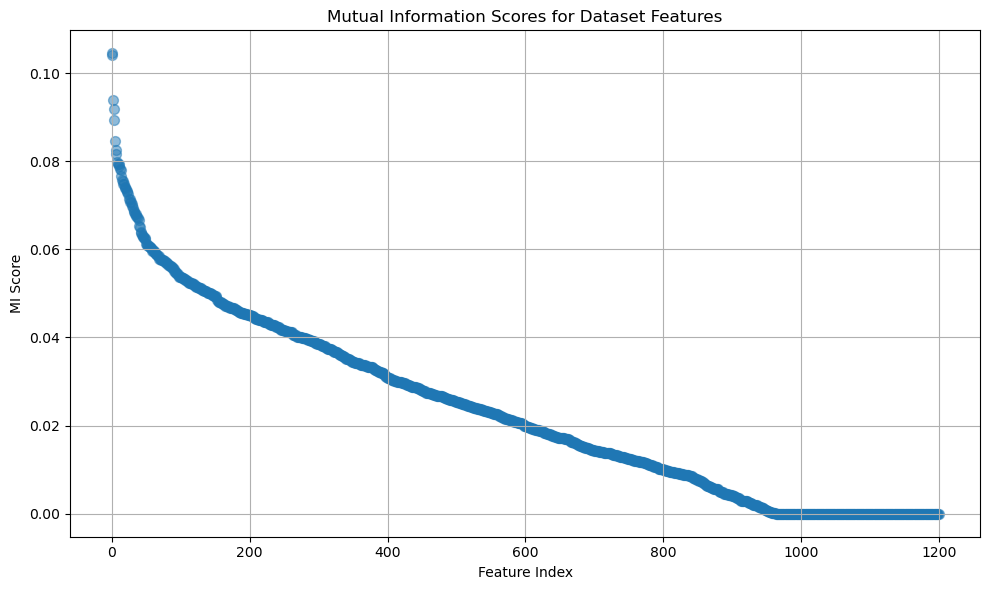

In [11]:
import matplotlib.pyplot as plt

# Create a scatter plot for mutual information scores
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mi_scores_series)), mi_scores_series, s=50, alpha=0.5)
plt.title("Mutual Information Scores for Dataset Features")
plt.xlabel("Feature Index")
plt.ylabel("MI Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Calculate mutual information scores using scikit-learn's mutual_info_classif
mi_scores = mutual_info_classif(X, y)

# Create a pandas Series with feature names as indices
mi_scores_series = pd.Series(mi_scores, index=X.columns, name="MI Scores")

# Create a DataFrame from the Series
mi_scores_df = pd.DataFrame(mi_scores_series)

# Print the mutual information scores
print(mi_scores_df)

# Save the DataFrame to a CSV file without sorting
mi_scores_df.to_csv("mi_scores_1200.csv")


            MI Scores
cg00690402   0.058108
cg02327530   0.036889
cg02673417   0.000000
cg02596779   0.052585
cg02076629   0.054385
...               ...
cg27347269   0.007035
cg23161218   0.057558
cg25031824   0.022575
cg25936138   0.038981
cg24876577   0.000000

[1200 rows x 1 columns]


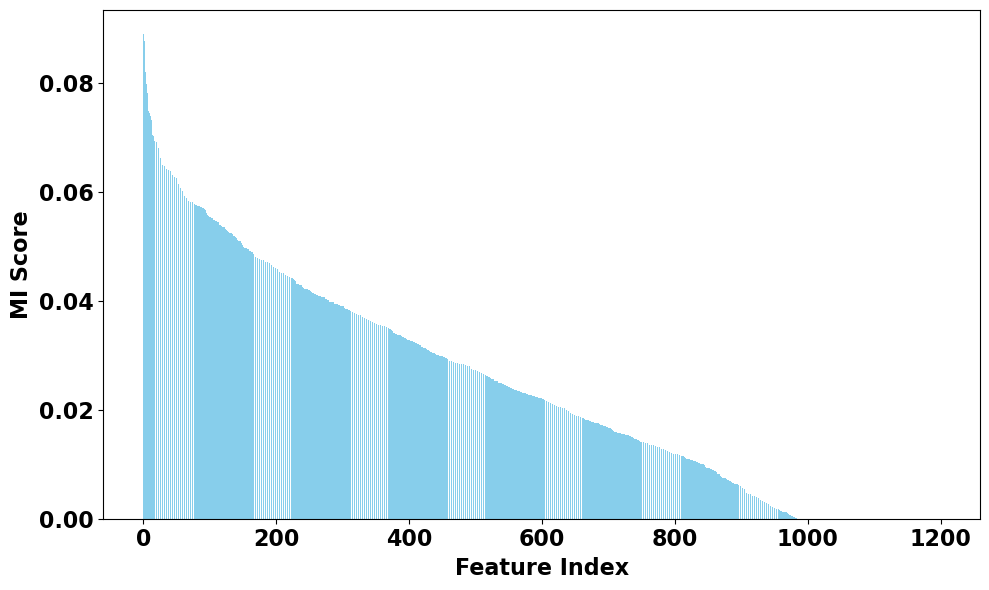

In [64]:
import matplotlib.pyplot as plt

# Define a threshold for color differentiation
threshold = 0.0  # Adjust the threshold as needed

# Sort the MI scores in descending order
mi_scores_series = mi_scores_series.sort_values(ascending=False)

# Create a list of colors based on MI scores
colors = ['skyblue' if score >= threshold else 'salmon' for score in mi_scores_series]

# Create a bar plot for mutual information scores with different colors
plt.figure(figsize=(10, 6))
plt.bar(range(len(mi_scores_series)), mi_scores_series, color=colors)
plt.xlabel("Feature Index", weight='bold', fontsize=16)
plt.ylabel("MI Score", weight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=16)  # Increase the font size of x-axis labels
plt.yticks(fontweight='bold', fontsize=16)  # Increase the font size of y-axis labels and values
plt.tight_layout()

# Save the plot as a high-definition image (e.g., PNG)
plt.savefig("mi_scores_plot.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


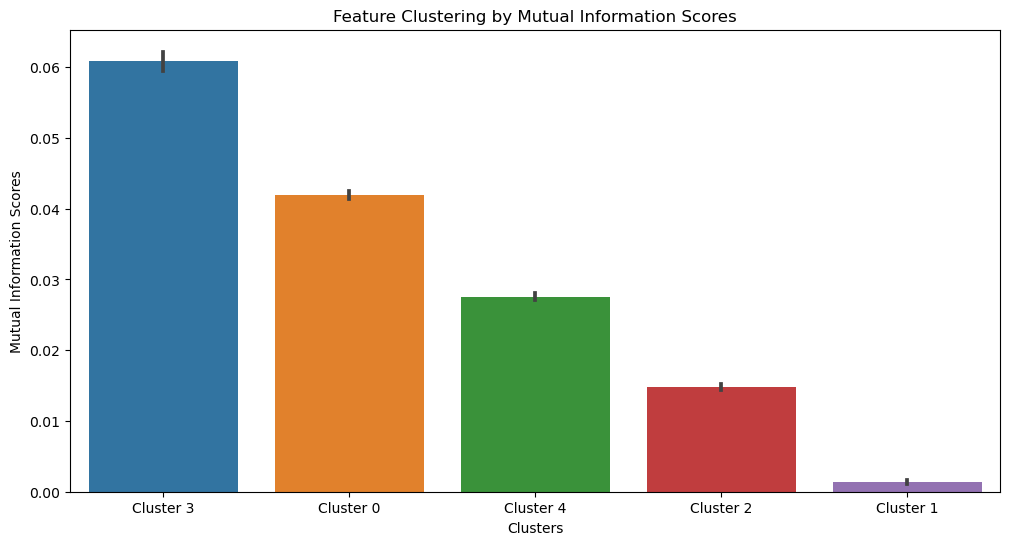

In [45]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have mi_scores_df as a DataFrame with feature names as the index
# and mi_scores as a column containing the MI scores

# Sort the DataFrame by MI scores (optional)
mi_scores_df = mi_scores_df.sort_values(by="MI Scores", ascending=False)

# Specify the number of clusters you want
num_clusters = 5  # Adjust as needed

# Extract the MI scores as the input data for clustering
X = mi_scores_df["MI Scores"].values.reshape(-1, 1)

# Apply K-means clustering to group features into clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
mi_scores_df["Cluster"] = kmeans.fit_predict(X)

# Create a dictionary to map cluster numbers to custom cluster names
cluster_names = {0: "Cluster 0", 1: "Cluster 1", 2: "Cluster 2", 3: "Cluster 3", 4: "Cluster 4"}

# Replace cluster numbers with custom cluster names
mi_scores_df["Cluster Name"] = mi_scores_df["Cluster"].map(cluster_names)

# Visualize the MI scores within each cluster
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster Name", y="MI Scores", data=mi_scores_df)
plt.xlabel("Clusters")
plt.ylabel("Mutual Information Scores")
plt.title("Feature Clustering by Mutual Information Scores")
plt.xticks(rotation=0)
plt.show()


In [13]:
# Define the MI score threshold for feature selection
mi_threshold = 0 

# Select features with MI scores above the threshold
selected_features = mi_scores_series[mi_scores_series > mi_threshold].index.tolist()

# Create a new DataFrame with only the selected features
X_selected = X[selected_features]

X_selected


,cg00690402,cg02327530,cg02596779,cg02076629,cg02541582,cg03720100,cg02551745,cg01841651,cg02381279,cg01711160,...,cg25757820,cg23575275,cg26646867,cg26124980,cg24453118,cg27360727,cg27347269,cg23161218,cg25031824,cg25936138
0,7428,2827,1284,4374,3878,2477,3601,3583,1247,4542,...,3020,4583,788,620,1244,5225,650,3220,7311,3076
1,6905,2735,1448,3746,3935,2278,3211,2884,1412,4883,...,3011,5377,900,1129,1673,4492,649,3721,6467,4134
2,6743,1521,913,3363,3641,2048,3266,2646,1118,4790,...,2818,4346,890,773,1301,3698,522,2336,6090,1809
3,6792,2105,1319,3447,3289,2722,3074,2840,1506,4895,...,2849,4677,925,711,1720,3896,592,2748,7167,5028
4,5773,2421,1075,3146,3137,2790,3177,3180,1526,4002,...,3012,4026,853,658,1492,3751,667,2793,8517,2292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,4144,1682,601,2626,2478,1514,2613,2368,1109,3729,...,2043,3506,788,429,662,2668,458,1450,4820,3226
843,5034,1360,879,3071,3536,2122,2626,2401,874,4314,...,2350,3494,648,425,1304,3396,519,2235,5554,2115
844,7611,2793,1278,4280,4181,3322,4206,3966,1437,5062,...,2750,5604,914,1372,1841,5849,546,3999,7724,4897
845,4430,1626,717,3043,2710,2270,2811,2613,1047,3379,...,2241,3368,845,780,1156,3959,615,1420,4278,3592


# Model build

#  1)SVM 10 fold CV

Fold 1 - Accuracy: 0.73
Fold 2 - Accuracy: 0.69
Fold 3 - Accuracy: 0.65
Fold 4 - Accuracy: 0.74
Fold 5 - Accuracy: 0.78
Fold 6 - Accuracy: 0.78
Fold 7 - Accuracy: 0.75
Fold 8 - Accuracy: 0.76
Fold 9 - Accuracy: 0.73
Fold 10 - Accuracy: 0.79
Mean Accuracy (100 features): 0.74
Standard Deviation (100 features): 0.04

Fold 1 - Accuracy: 0.61
Fold 2 - Accuracy: 0.72
Fold 3 - Accuracy: 0.69
Fold 4 - Accuracy: 0.74
Fold 5 - Accuracy: 0.74
Fold 6 - Accuracy: 0.69
Fold 7 - Accuracy: 0.72
Fold 8 - Accuracy: 0.75
Fold 9 - Accuracy: 0.68
Fold 10 - Accuracy: 0.74
Mean Accuracy (150 features): 0.71
Standard Deviation (150 features): 0.04



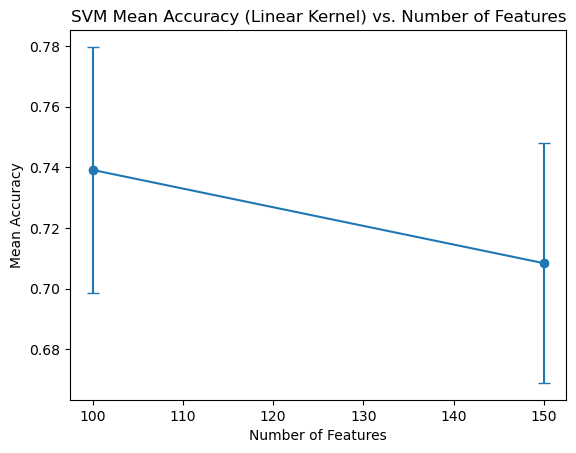

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Define a function to train and evaluate SVM with a linear kernel using 10-fold CV
def train_and_evaluate_svm(X, y, num_features, n_folds):
    # Apply feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=num_features)
    X_pca = pca.fit_transform(X_scaled)

    # Create an SVM classifier with a linear kernel
    svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')

    # Perform cross-validation
    scores = cross_val_score(svm_classifier, X_pca, y, cv=n_folds)

    # Print accuracy for each fold
    for i, acc in enumerate(scores):
        print(f"Fold {i + 1} - Accuracy: {acc:.2f}")

    # Calculate and print the mean accuracy
    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)
    print(f"Mean Accuracy ({num_features} features): {mean_accuracy:.2f}")
    print(f"Standard Deviation ({num_features} features): {std_accuracy:.2f}")
    print()

    return mean_accuracy, std_accuracy

def plot_svm_mean_accuracy_vs_features(X, y, num_features_range, n_folds):
    # Create a list to store mean accuracies and standard deviations for different numbers of features
    mean_accuracies = []
    std_accuracies = []

    for num_features in num_features_range:
        mean_accuracy, std_accuracy = train_and_evaluate_svm(X, y, num_features, n_folds)
        mean_accuracies.append(mean_accuracy)
        std_accuracies.append(std_accuracy)

    # Plot the results for the linear kernel with standard deviation
    plt.errorbar(num_features_range, mean_accuracies, yerr=std_accuracies, fmt='o-', capsize=4)
    plt.xlabel("Number of Features")
    plt.ylabel("Mean Accuracy")
    plt.title("SVM Mean Accuracy (Linear Kernel) vs. Number of Features")
    plt.show()


num_features_range = range(100, 200, 50)
n_folds = 10  # You can adjust the number of folds

plot_svm_mean_accuracy_vs_features(X, y, num_features_range, n_folds)


Fold 1 - Accuracy: 0.76
Fold 2 - Accuracy: 0.67
Fold 3 - Accuracy: 0.65
Fold 4 - Accuracy: 0.79
Fold 5 - Accuracy: 0.81
Fold 6 - Accuracy: 0.76
Fold 7 - Accuracy: 0.68
Fold 8 - Accuracy: 0.71
Fold 9 - Accuracy: 0.73
Fold 10 - Accuracy: 0.79
Mean Accuracy (100 features): 0.74
Standard Deviation (100 features): 0.05

Fold 1 - Accuracy: 0.65
Fold 2 - Accuracy: 0.71
Fold 3 - Accuracy: 0.71
Fold 4 - Accuracy: 0.71
Fold 5 - Accuracy: 0.80
Fold 6 - Accuracy: 0.75
Fold 7 - Accuracy: 0.65
Fold 8 - Accuracy: 0.74
Fold 9 - Accuracy: 0.68
Fold 10 - Accuracy: 0.73
Mean Accuracy (200 features): 0.71
Standard Deviation (200 features): 0.04

Fold 1 - Accuracy: 0.64
Fold 2 - Accuracy: 0.75
Fold 3 - Accuracy: 0.69
Fold 4 - Accuracy: 0.68
Fold 5 - Accuracy: 0.75
Fold 6 - Accuracy: 0.73
Fold 7 - Accuracy: 0.69
Fold 8 - Accuracy: 0.70
Fold 9 - Accuracy: 0.67
Fold 10 - Accuracy: 0.69
Mean Accuracy (300 features): 0.70
Standard Deviation (300 features): 0.03

Fold 1 - Accuracy: 0.62
Fold 2 - Accuracy: 0.71
F

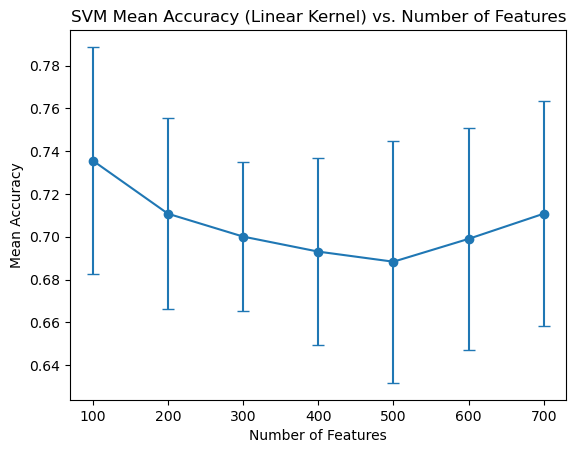

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Define a function to train and evaluate SVM with a linear kernel using 10-fold CV
def train_and_evaluate_svm(X, y, num_features, n_folds):
    # Apply feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=num_features)
    X_pca = pca.fit_transform(X_scaled)

    # Create an SVM classifier with a linear kernel
    svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')

    # Perform cross-validation
    scores = cross_val_score(svm_classifier, X_pca, y, cv=n_folds)

    # Print accuracy for each fold
    for i, acc in enumerate(scores):
        print(f"Fold {i + 1} - Accuracy: {acc:.2f}")

    # Calculate and print the mean accuracy
    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)
    print(f"Mean Accuracy ({num_features} features): {mean_accuracy:.2f}")
    print(f"Standard Deviation ({num_features} features): {std_accuracy:.2f}")
    print()

    return mean_accuracy, std_accuracy

def plot_svm_mean_accuracy_vs_features(X, y, num_features_range, n_folds):
    # Create a list to store mean accuracies and standard deviations for different numbers of features
    mean_accuracies = []
    std_accuracies = []

    for num_features in num_features_range:
        mean_accuracy, std_accuracy = train_and_evaluate_svm(X, y, num_features, n_folds)
        mean_accuracies.append(mean_accuracy)
        std_accuracies.append(std_accuracy)

    # Plot the results for the linear kernel with standard deviation
    plt.errorbar(num_features_range, mean_accuracies, yerr=std_accuracies, fmt='o-', capsize=4)
    plt.xlabel("Number of Features")
    plt.ylabel("Mean Accuracy")
    plt.title("SVM Mean Accuracy (Linear Kernel) vs. Number of Features")
    plt.show()


num_features_range = range(100, 800, 100)
n_folds = 10  # You can adjust the number of folds

plot_svm_mean_accuracy_vs_features(X, y, num_features_range, n_folds)


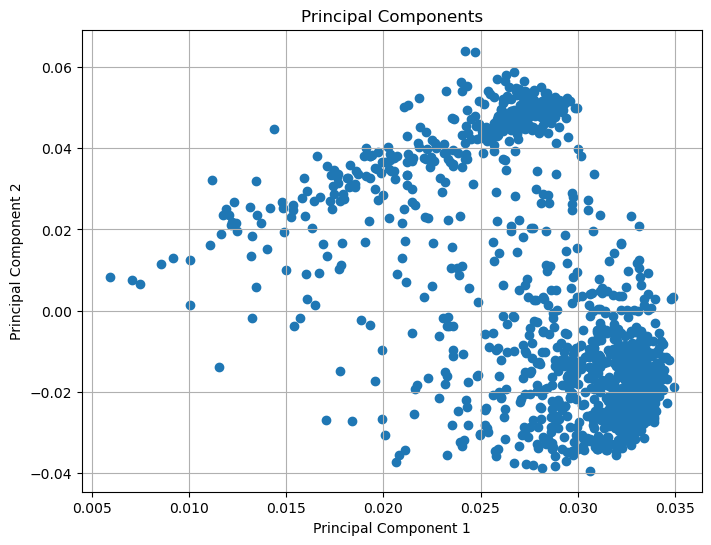

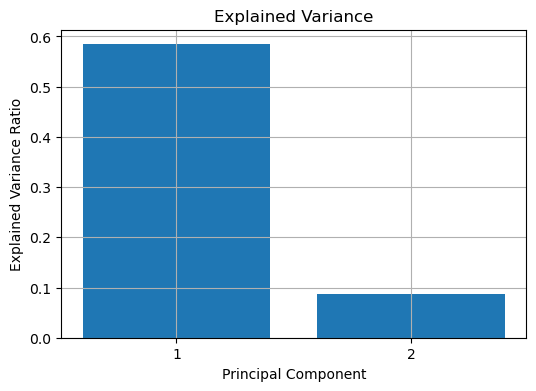

In [24]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your original feature matrix

# Fit PCA to your scaled data
pca = PCA(n_components=2)  # Choose the number of components you want to visualize
X_pca = pca.fit_transform(X_scaled)

# Access the principal components and explained variance
principal_components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[0], principal_components[1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Principal Components")
plt.grid()

# Plot the explained variance
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance")
plt.xticks(range(1, len(explained_variance) + 1))  # Fix the error here
plt.grid()

plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Define a function to train and evaluate SVM with a linear kernel using 10-fold CV
def train_and_evaluate_svm(X, y, num_features):
    # Select the top features based on MI scores
    top_features = mi_scores_series.nlargest(num_features).index.tolist()
    # Create a new DataFrame with only the selected features
    X_top_features = X[top_features]

    # Create an SVM classifier with a linear kernel
    svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')

    # Perform 10-fold cross-validation
    scores = cross_val_score(svm_classifier, X_top_features, y, cv=10)

    # Return a list of accuracy values for each fold
    return scores

def plot_svm_mean_accuracy_vs_features(X, y, num_features_range):
    # Create a list to store mean accuracies and standard deviations for different numbers of features
    mean_accuracies = []
    std_accuracies = []

    for num_features in num_features_range:
        fold_accuracies = train_and_evaluate_svm(X, y, num_features)
        mean_accuracy = np.mean(fold_accuracies)
        std_accuracy = np.std(fold_accuracies)
        mean_accuracies.append(mean_accuracy)
        std_accuracies.append(std_accuracy)

        # Print accuracy and standard deviation for each fold
        for i, acc in enumerate(fold_accuracies):
            print(f"Fold {i+1} - Accuracy: {acc:.2f}")

        # Print mean accuracy and standard deviation for the current number of features
        print(f"Mean Accuracy ({num_features} features): {mean_accuracy:.2f}")
        print(f"Standard Deviation ({num_features} features): {std_accuracy:.2f}")
        print()

    # Plot the results for the linear kernel with standard deviation
    plt.errorbar(num_features_range, mean_accuracies, yerr=std_accuracies, fmt='o-', capsize=4)
    plt.xlabel("Number of Features")
    plt.ylabel("Mean Accuracy")
    plt.title("SVM Mean Accuracy (Linear Kernel) vs. Number of Features")
    plt.show()

# Rest of your code remains the same


In [ ]:
num_features_range = range(100, 200, 50)
plot_svm_mean_accuracy_vs_features(X, y, num_features_range)

# Find the index of the feature count with the highest mean accuracy
best_index = np.argmax(mean_accuracy)
best_num_features = num_features_range[best_index]
best_mean_accuracy = mean_accuracy[best_index]
best_std_accuracy = std_accuracy[best_index]

# Print the best result with standard deviation
print(f"Best mean accuracy: {best_mean_accuracy:.2f} with {best_num_features} features.")
print(f"Standard deviation: {best_std_accuracy:.2f}")


# 2) RF with 50 trees and 10 fold CV

Number of Features: 100
Fold 1 - Accuracy: 0.68
Fold 2 - Accuracy: 0.69
Fold 3 - Accuracy: 0.60
Fold 4 - Accuracy: 0.72
Fold 5 - Accuracy: 0.53
Fold 6 - Accuracy: 0.73
Fold 7 - Accuracy: 0.65
Fold 8 - Accuracy: 0.67
Fold 9 - Accuracy: 0.73
Fold 10 - Accuracy: 0.64
Mean Accuracy: 0.66
Standard Deviation: 0.06
Number of Features: 200
Fold 1 - Accuracy: 0.69
Fold 2 - Accuracy: 0.65
Fold 3 - Accuracy: 0.56
Fold 4 - Accuracy: 0.69
Fold 5 - Accuracy: 0.54
Fold 6 - Accuracy: 0.74
Fold 7 - Accuracy: 0.65
Fold 8 - Accuracy: 0.67
Fold 9 - Accuracy: 0.74
Fold 10 - Accuracy: 0.64
Mean Accuracy: 0.66
Standard Deviation: 0.06
Number of Features: 300
Fold 1 - Accuracy: 0.65
Fold 2 - Accuracy: 0.75
Fold 3 - Accuracy: 0.66
Fold 4 - Accuracy: 0.81
Fold 5 - Accuracy: 0.60
Fold 6 - Accuracy: 0.67
Fold 7 - Accuracy: 0.68
Fold 8 - Accuracy: 0.73
Fold 9 - Accuracy: 0.74
Fold 10 - Accuracy: 0.64
Mean Accuracy: 0.69
Standard Deviation: 0.06
Number of Features: 400
Fold 1 - Accuracy: 0.65
Fold 2 - Accuracy: 0.7

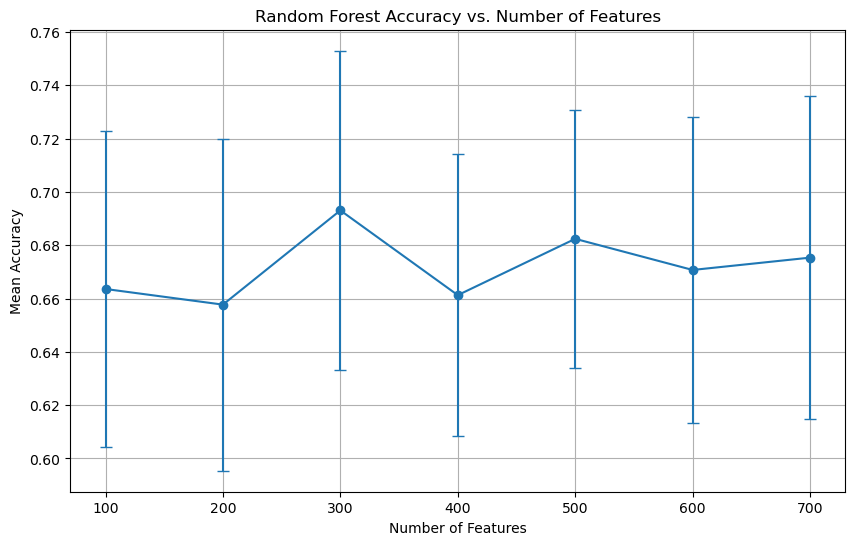

Best mean accuracy: 0.69 with 300 features.
Standard deviation: 0.06


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define a function to train and evaluate Random Forest with different feature counts
def train_and_evaluate_random_forest_with_varied_features(X, y, feature_counts):
    # Lists to store mean accuracy scores and standard deviations for each feature count
    mean_accuracies = []
    std_accuracies = []

    # List of number of trees to test
    n_estimators = 50  # You can adjust this if needed

    for num_features in feature_counts:
        # Select the top 'num_features' features from the dataset
        X_selected_features = X.iloc[:, :num_features]

        # Create Random Forest classifier with the specified number of trees
        rf_classifier = RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators, random_state=42)

        # Perform 10-fold cross-validation
        scores = cross_val_score(rf_classifier, X_selected_features, y, cv=10, scoring='accuracy')

        # Calculate the mean accuracy and standard deviation and store them
        mean_accuracy = np.mean(scores)
        std_accuracy = np.std(scores)
        mean_accuracies.append(mean_accuracy)
        std_accuracies.append(std_accuracy)

        # Print the results for each fold
        print(f"Number of Features: {num_features}")
        for fold, accuracy in enumerate(scores, 1):
            print(f"Fold {fold} - Accuracy: {accuracy:.2f}")

        # Print the mean accuracy and standard deviation
        print(f"Mean Accuracy: {mean_accuracy:.2f}")
        print(f"Standard Deviation: {std_accuracy:.2f}")
        print("=" * 30)

    return mean_accuracies, std_accuracies

# Define a range of different feature counts to test
feature_counts_to_test = list(range(100, 800, 100))

# Call the train_and_evaluate_random_forest_with_varied_features function
mean_accuracies, std_accuracies = train_and_evaluate_random_forest_with_varied_features(X, y, feature_counts_to_test)

# Plot the accuracy graph with standard deviation
plt.figure(figsize=(10, 6))
plt.errorbar(feature_counts_to_test, mean_accuracies, yerr=std_accuracies, fmt='o-', capsize=4)
plt.title('Random Forest Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

# Print the best result with standard deviation
best_index = np.argmax(mean_accuracies)
best_num_features = feature_counts_to_test[best_index]
best_mean_accuracy = mean_accuracies[best_index]
best_std_accuracy = std_accuracies[best_index]
print(f"Best mean accuracy: {best_mean_accuracy:.2f} with {best_num_features} features.")
print(f"Standard deviation: {best_std_accuracy:.2f}")


# 3)RF with 50 trees and 5 fold CV

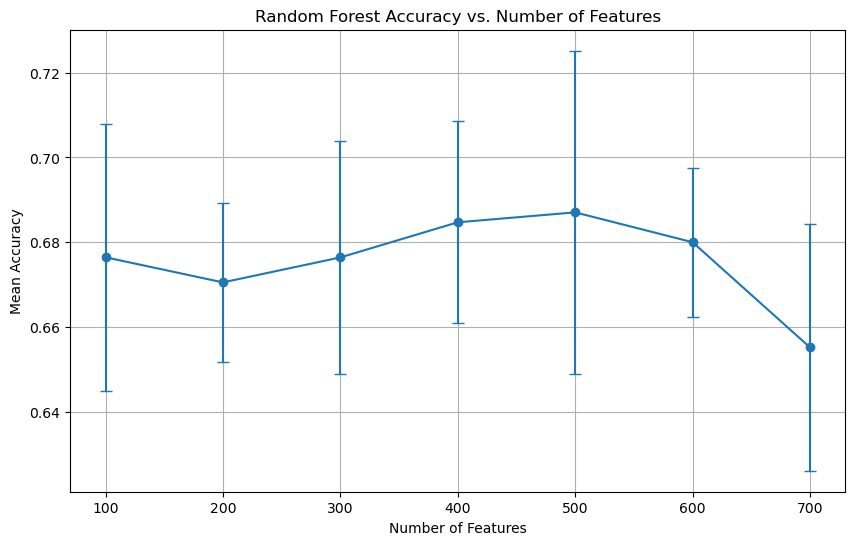

Best mean accuracy: 0.69 with 500 features.
Standard deviation: 0.04


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define a function to train and evaluate Random Forest with different feature counts
def train_and_evaluate_random_forest_with_varied_features(X, y, feature_counts):
    # Lists to store mean accuracy scores and standard deviations for each feature count
    mean_accuracies = []
    std_accuracies = []

    # List of number of trees to test
    n_estimators = 50  # You can adjust this if needed

    for num_features in feature_counts:
        # Select the top 'num_features' features from the dataset
        X_selected_features = X.iloc[:, :num_features]

        # Create Random Forest classifier with the specified number of trees
        rf_classifier = RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators, random_state=42)

        # Perform 10-fold cross-validation
        scores = cross_val_score(rf_classifier, X_selected_features, y, cv=5)

        # Calculate the mean accuracy and standard deviation and store them
        mean_accuracy = np.mean(scores)
        std_accuracy = np.std(scores)
        mean_accuracies.append(mean_accuracy)
        std_accuracies.append(std_accuracy)

    return mean_accuracies, std_accuracies

# Define a range of different feature counts to test
feature_counts_to_test = list(range(100, 800, 100))

# Call the train_and_evaluate_random_forest_with_varied_features function
mean_accuracies, std_accuracies = train_and_evaluate_random_forest_with_varied_features(X, y, feature_counts_to_test)

# Find the index of the feature count with the highest mean accuracy
best_index = np.argmax(mean_accuracies)
best_num_features = feature_counts_to_test[best_index]
best_mean_accuracy = mean_accuracies[best_index]
best_std_accuracy = std_accuracies[best_index]

# Plot the accuracy graph with standard deviation
plt.figure(figsize=(10, 6))
plt.errorbar(feature_counts_to_test, mean_accuracies, yerr=std_accuracies, fmt='o-', capsize=4)
plt.title('Random Forest Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

# Print the best result with standard deviation
print(f"Best mean accuracy: {best_mean_accuracy:.2f} with {best_num_features} features.")
print(f"Standard deviation: {best_std_accuracy:.2f}")


# 4) K-NN

C:\Users\User\AppData\Local\Temp\ipykernel_3980\1985403123.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = result_df.pivot("k Value", "Num Features", "Mean Accuracy")


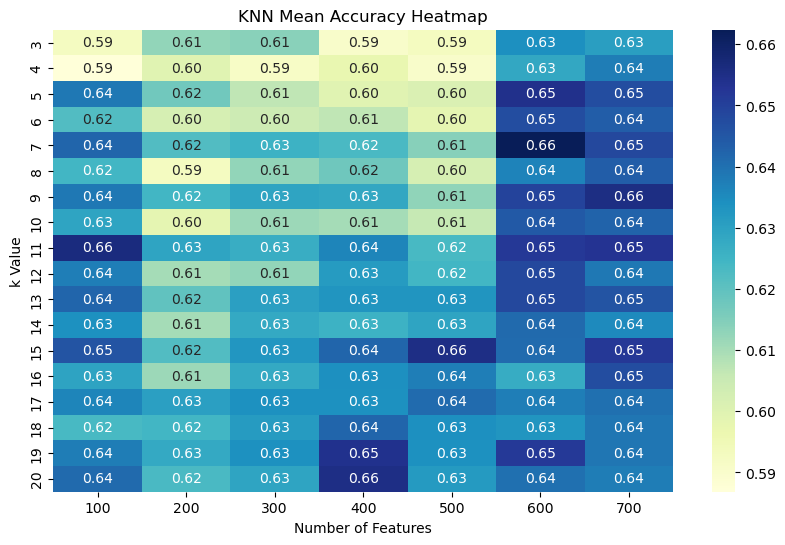

Best Number of Features: 600.0
Best k Value: 7.0
Best Accuracy: 0.66


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a function to train and evaluate KNN with different feature counts and k values
def train_and_evaluate_knn_with_varied_features(X, y, feature_counts, k_values):
    results = []

    for num_features in feature_counts:
        top_features = mi_scores_series.nlargest(num_features).index.tolist()
        X_top_features = X[top_features]

        for k in k_values:
            knn_classifier = KNeighborsClassifier(n_neighbors=k)

            # Perform 10-fold cross-validation
            scores = cross_val_score(knn_classifier, X_top_features, y, cv=10)

            # Calculate the mean accuracy for this combination of features and k value
            mean_accuracy = scores.mean()

            results.append((num_features, k, mean_accuracy))

    return results

# Define a range of different feature counts to test
feature_counts_to_test = list(range(100, 800, 100))

# Define a range of k values to test, starting from 3
k_values_to_test = list(range(3, 21))

# Call the train_and_evaluate_knn_with_varied_features function
results = train_and_evaluate_knn_with_varied_features(X, y, feature_counts_to_test, k_values_to_test)

# Convert results to a DataFrame for plotting
result_df = pd.DataFrame(results, columns=["Num Features", "k Value", "Mean Accuracy"])
heatmap_data = result_df.pivot("k Value", "Num Features", "Mean Accuracy")

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("KNN Mean Accuracy Heatmap")
plt.xlabel("Number of Features")
plt.ylabel("k Value")
plt.show()

# Find the best combination of features and k value
best_result = result_df.loc[result_df["Mean Accuracy"].idxmax()]
best_num_features, best_k, best_accuracy = best_result["Num Features"], best_result["k Value"], best_result["Mean Accuracy"]

print(f"Best Number of Features: {best_num_features}")
print(f"Best k Value: {best_k}")
print(f"Best Accuracy: {best_accuracy:.2f}")
